In [1]:
ROOT_PATH = '/cephyr/users/shirinta/Alvis/Projects/LlamaRec/experiments/Llama-2-7b-hf/ml-1m'

In [2]:
import os
import json
from collections import defaultdict

In [3]:
# Define the directories and the json files pattern
directories = [f'{ROOT_PATH}/round_{i}' for i in range(1, 6)]
json_files = [f'subset_metrics_{i}.json' for i in range(1, 21)]

# Attributes to average
attributes = [
    "test_Recall@10", "test_MRR@10", "test_NDCG@10", 
    "test_Recall@5", "test_MRR@5", "test_NDCG@5", 
    "test_Recall@1", "test_MRR@1", "test_NDCG@1"
]

In [4]:
results = {}
averages = {}
stds = {}

for json_file in json_files:
    key = json_file.split(".json")[0]
    results[key] = {attr: [] for attr in attributes}
    averages[key] = {attr: 0 for attr in attributes}
    stds[key] = {attr: 0 for attr in attributes}
    
results

{'subset_metrics_1': {'test_Recall@10': [],
  'test_MRR@10': [],
  'test_NDCG@10': [],
  'test_Recall@5': [],
  'test_MRR@5': [],
  'test_NDCG@5': [],
  'test_Recall@1': [],
  'test_MRR@1': [],
  'test_NDCG@1': []},
 'subset_metrics_2': {'test_Recall@10': [],
  'test_MRR@10': [],
  'test_NDCG@10': [],
  'test_Recall@5': [],
  'test_MRR@5': [],
  'test_NDCG@5': [],
  'test_Recall@1': [],
  'test_MRR@1': [],
  'test_NDCG@1': []},
 'subset_metrics_3': {'test_Recall@10': [],
  'test_MRR@10': [],
  'test_NDCG@10': [],
  'test_Recall@5': [],
  'test_MRR@5': [],
  'test_NDCG@5': [],
  'test_Recall@1': [],
  'test_MRR@1': [],
  'test_NDCG@1': []},
 'subset_metrics_4': {'test_Recall@10': [],
  'test_MRR@10': [],
  'test_NDCG@10': [],
  'test_Recall@5': [],
  'test_MRR@5': [],
  'test_NDCG@5': [],
  'test_Recall@1': [],
  'test_MRR@1': [],
  'test_NDCG@1': []},
 'subset_metrics_5': {'test_Recall@10': [],
  'test_MRR@10': [],
  'test_NDCG@10': [],
  'test_Recall@5': [],
  'test_MRR@5': [],
  'tes

In [5]:
# Traverse directories and JSON files
for directory in directories:
    for json_file in json_files:
        key = json_file.split(".json")[0]
        file_path = os.path.join(directory, json_file)
        if os.path.isfile(file_path):
            with open(file_path, 'r') as f:
                data = json.load(f)
                for attr in attributes:
                    if attr in data:
                        results[key][attr].append(data[attr])

In [6]:
import numpy as np

for json_file in json_files:
    key = json_file.split(".json")[0]
    for attr in attributes:
        l = results[key][attr]
        avg = sum(l) / len(l)
        variance = sum((x - avg) ** 2 for x in l) / len(l)
        std = np.sqrt(variance)
        attr_key_avg = f"avg_{attr}"
        attr_key_std = f"std_{attr}"
        results[key][attr_key_avg] = avg
        results[key][attr_key_std] = std
        averages[key][attr] = avg
        stds[key][attr] = std

In [7]:
results['subset_metrics_1']

{'test_Recall@10': [1.0, 1.0, 1.0, 1.0, 1.0],
 'test_MRR@10': [0.9974337816238403,
  0.9976820945739746,
  0.9976820945739746,
  0.9976820945739746,
  0.9976820945739746],
 'test_NDCG@10': [0.9981057047843933,
  0.9982889890670776,
  0.9982889890670776,
  0.9982889890670776,
  0.9982889890670776],
 'test_Recall@5': [1.0, 1.0, 1.0, 1.0, 1.0],
 'test_MRR@5': [0.9974337816238403,
  0.9976820945739746,
  0.9976820945739746,
  0.9976820945739746,
  0.9976820945739746],
 'test_NDCG@5': [0.9981057047843933,
  0.9982889890670776,
  0.9982889890670776,
  0.9982889890670776,
  0.9982889890670776],
 'test_Recall@1': [0.9948675632476807,
  0.995364248752594,
  0.995364248752594,
  0.995364248752594,
  0.995364248752594],
 'test_MRR@1': [0.9948675632476807,
  0.995364248752594,
  0.995364248752594,
  0.995364248752594,
  0.995364248752594],
 'test_NDCG@1': [0.9948675632476807,
  0.995364248752594,
  0.995364248752594,
  0.995364248752594,
  0.995364248752594],
 'avg_test_Recall@10': 1.0,
 'std_test

In [8]:
stds

{'subset_metrics_1': {'test_Recall@10': 0.0,
  'test_MRR@10': 9.932518005371093e-05,
  'test_NDCG@10': 7.331371307373047e-05,
  'test_Recall@5': 0.0,
  'test_MRR@5': 9.932518005371093e-05,
  'test_NDCG@5': 7.331371307373047e-05,
  'test_Recall@1': 0.00019867420196533202,
  'test_MRR@1': 0.00019867420196533202,
  'test_NDCG@1': 0.00019867420196533202},
 'subset_metrics_2': {'test_Recall@10': 0.0,
  'test_MRR@10': 0.0,
  'test_NDCG@10': 0.0,
  'test_Recall@5': 0.0,
  'test_MRR@5': 0.0,
  'test_NDCG@5': 0.0,
  'test_Recall@1': 0.0,
  'test_MRR@1': 0.0,
  'test_NDCG@1': 0.0},
 'subset_metrics_3': {'test_Recall@10': 0.0,
  'test_MRR@10': 0.0,
  'test_NDCG@10': 0.0,
  'test_Recall@5': 0.0,
  'test_MRR@5': 0.0,
  'test_NDCG@5': 0.0,
  'test_Recall@1': 0.0,
  'test_MRR@1': 0.0,
  'test_NDCG@1': 0.0},
 'subset_metrics_4': {'test_Recall@10': 0.0,
  'test_MRR@10': 0.0,
  'test_NDCG@10': 0.0,
  'test_Recall@5': 0.0,
  'test_MRR@5': 0.0,
  'test_NDCG@5': 0.0,
  'test_Recall@1': 0.0,
  'test_MRR@1':

In [9]:
averages

{'subset_metrics_1': {'test_Recall@10': 1.0,
  'test_MRR@10': 0.9976324319839478,
  'test_NDCG@10': 0.9982523322105408,
  'test_Recall@5': 1.0,
  'test_MRR@5': 0.9976324319839478,
  'test_NDCG@5': 0.9982523322105408,
  'test_Recall@1': 0.9952649116516114,
  'test_MRR@1': 0.9952649116516114,
  'test_NDCG@1': 0.9952649116516114},
 'subset_metrics_2': {'test_Recall@10': 0.9640728235244751,
  'test_MRR@10': 0.20825187861919403,
  'test_NDCG@10': 0.3837221562862396,
  'test_Recall@5': 0.570364236831665,
  'test_MRR@5': 0.1534050703048706,
  'test_NDCG@5': 0.2540796995162964,
  'test_Recall@1': 0.00016556291666347533,
  'test_MRR@1': 0.00016556291666347533,
  'test_NDCG@1': 0.00016556291666347533},
 'subset_metrics_3': {'test_Recall@10': 1.0,
  'test_MRR@10': 0.4741501212120056,
  'test_NDCG@10': 0.6105840802192688,
  'test_Recall@5': 1.0,
  'test_MRR@5': 0.4741501212120056,
  'test_NDCG@5': 0.6105840802192688,
  'test_Recall@1': 0.00033112583332695067,
  'test_MRR@1': 0.00033112583332695067

In [10]:
plot_data = []

In [11]:
str_1 = 'test_Recall@10'

str_1 != 'test_Recall@10'

False

In [12]:
attributes

['test_Recall@10',
 'test_MRR@10',
 'test_NDCG@10',
 'test_Recall@5',
 'test_MRR@5',
 'test_NDCG@5',
 'test_Recall@1',
 'test_MRR@1',
 'test_NDCG@1']

In [13]:
# Initialize a dictionary to hold the data for plotting
plot_data = {attr: [] for attr in attributes}
plot_std = {attr: [] for attr in attributes}

# Extract the values and the x-axis labels (numbers at the end of "subset_metrics_%")
x_labels = []
for subset, metrics in averages.items():
    print(subset)
    subset_number = int(subset.split('_')[-1])
    x_labels.append(subset_number)
    for attr, value in metrics.items():
        std_value = stds[subset][attr]
        plot_data[attr].append(value)
        plot_std[attr].append(std_value)

# Sort x_labels and corresponding plot_data
sorted_indices = sorted(range(len(x_labels)), key=lambda k: x_labels[k])
x_labels = [x_labels[i] for i in sorted_indices]
for attr in plot_data:
    plot_data[attr] = [plot_data[attr][i] for i in sorted_indices]

subset_metrics_1
subset_metrics_2
subset_metrics_3
subset_metrics_4
subset_metrics_5
subset_metrics_6
subset_metrics_7
subset_metrics_8
subset_metrics_9
subset_metrics_10
subset_metrics_11
subset_metrics_12
subset_metrics_13
subset_metrics_14
subset_metrics_15
subset_metrics_16
subset_metrics_17
subset_metrics_18
subset_metrics_19
subset_metrics_20


In [17]:
x_labels

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

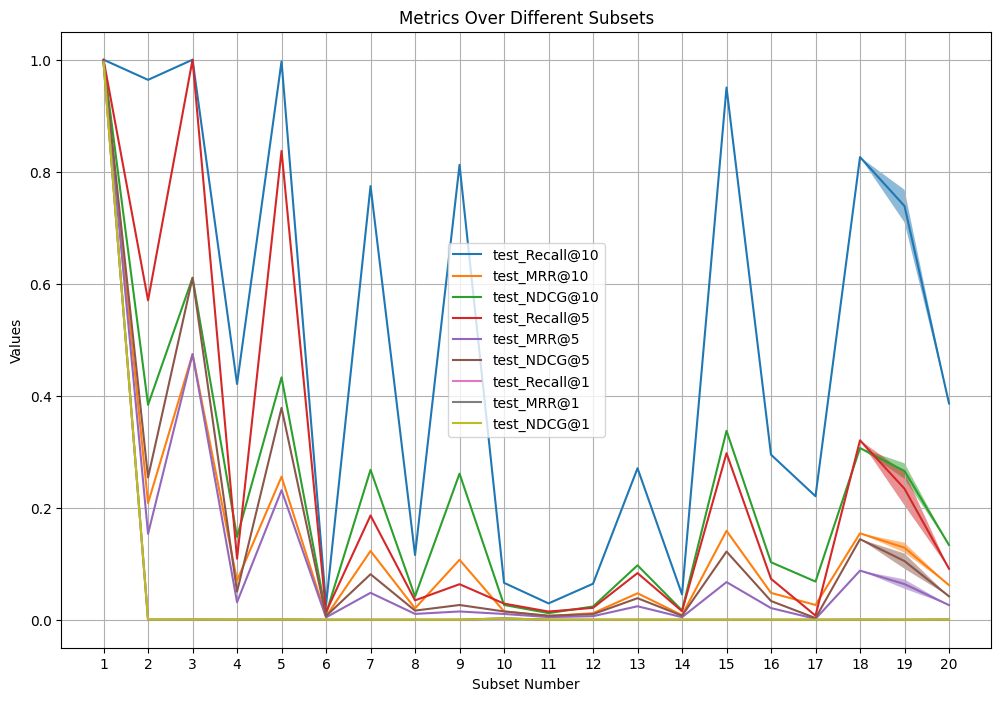

In [14]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 8))
for attr, values in plot_data.items():
    std_devs = plot_std[attr]
    values = np.array(values)
    std_devs = np.array(std_devs)
    print(attr)
    
    str_1 = ""
    for i in range(len(x_labels)):
        str_1 += f"({x_labels[i]},{values[i]}) "
    
    print(str_1)
    plt.plot(x_labels, values, label=attr)
    plt.fill_between(x_labels, values - std_devs, values + std_devs, alpha=0.5)

plt.xlabel('Subset Number')
plt.ylabel('Values')
plt.title('Metrics Over Different Subsets')
plt.xticks(ticks=x_labels)
plt.legend()
plt.grid(True)
plt.show()

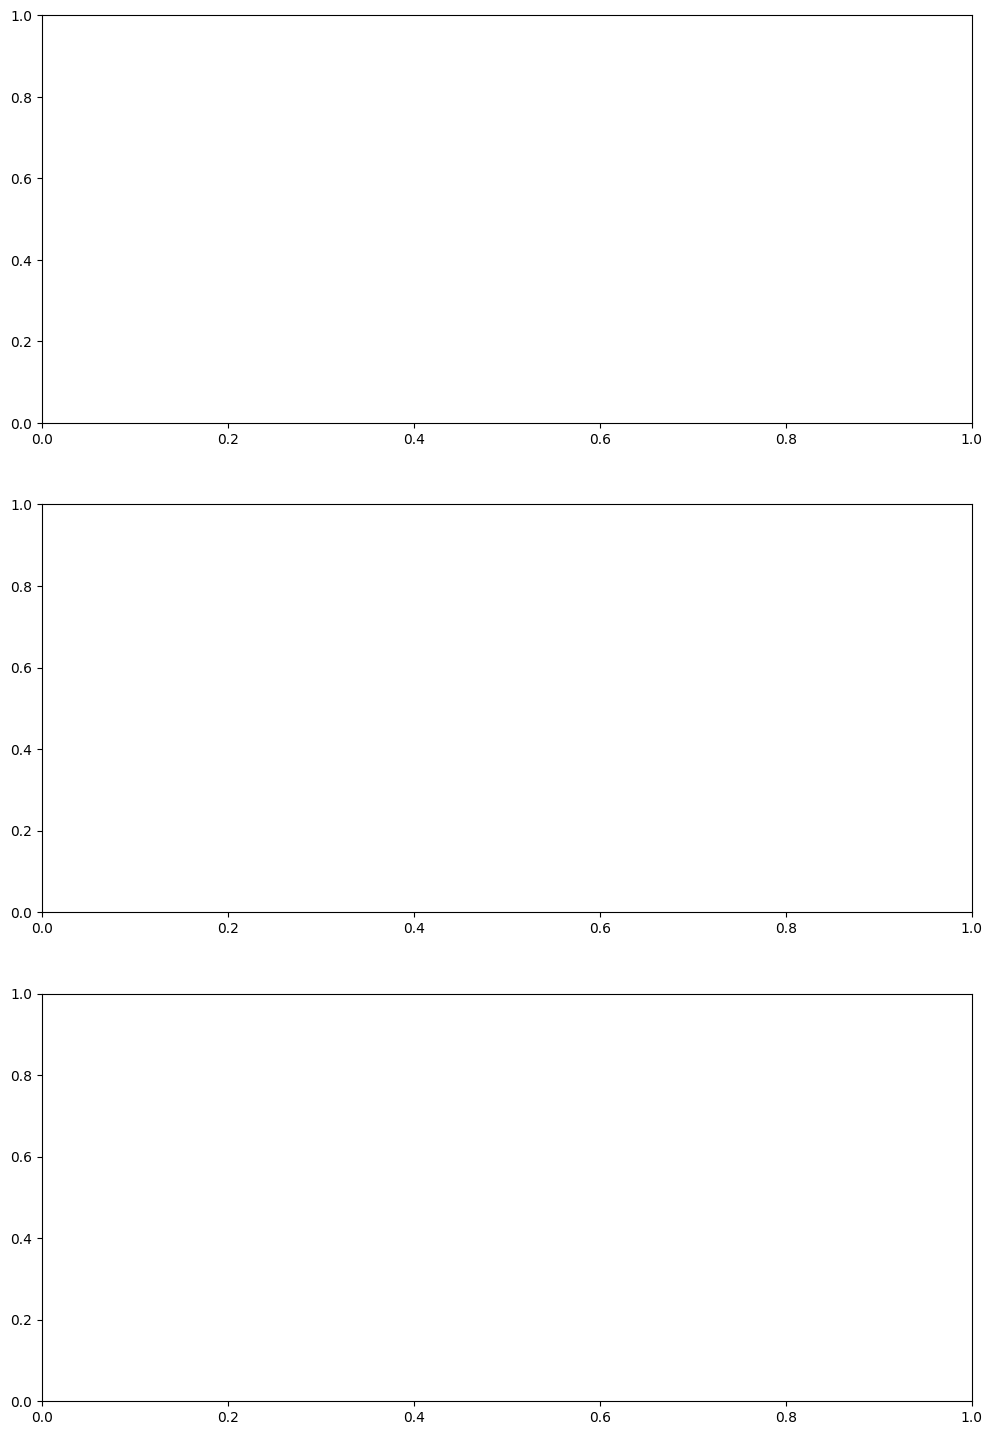

In [15]:
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

def draw_subplot(index):
    if index == 0:
        k = 1
    elif index == 1:
        k = 5
    if index == 2:
        k = 10
    
    attrs = [f'test_Recall@{k}', f'test_NDCG@{k}']
    for attr in attrs:
        values = np.array(plot_data[attr])
        std_devs = np.array(plot_std[attr])
        axs[index].plot(x_labels, values, label=attr)
        axs[index].fill_between(x_labels, values - std_devs, values + std_devs, alpha=0.2)
    axs[index].set_title(f'Metrics @{k}')
    axs[index].set_xlabel('Subset Number')
    axs[index].set_ylabel('Values')
    axs[index].legend()
    axs[index].grid(True)

In [18]:
plt.show()